In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-09-06 12:02:30.282258: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 12:02:30.374956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 12:02:31.822924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

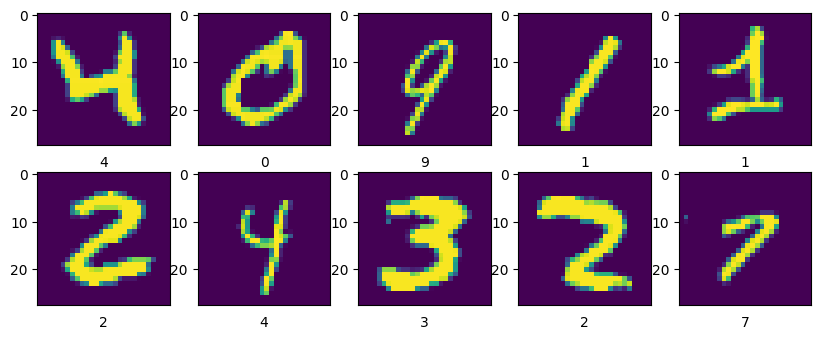

In [16]:
range_start = 20
plt.figure(figsize=(10,10))

for i in range(range_start,range_start + 10):
    plt.subplot(5,5,i-range_start+1)
    plt.xticks([])
    plt.xlabel(str(train_labels[i]))
    plt.imshow(train_images[i])
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1406 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1053 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9765


In [10]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nAccuracy: ", acc)

313/313 - 1s - loss: 0.0740 - accuracy: 0.9774 - 755ms/epoch - 2ms/step

Accuracy:  0.977400004863739


In [11]:
pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = pred_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [12]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                         100*np.max(predictions_array),
                                         str(true_label)),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

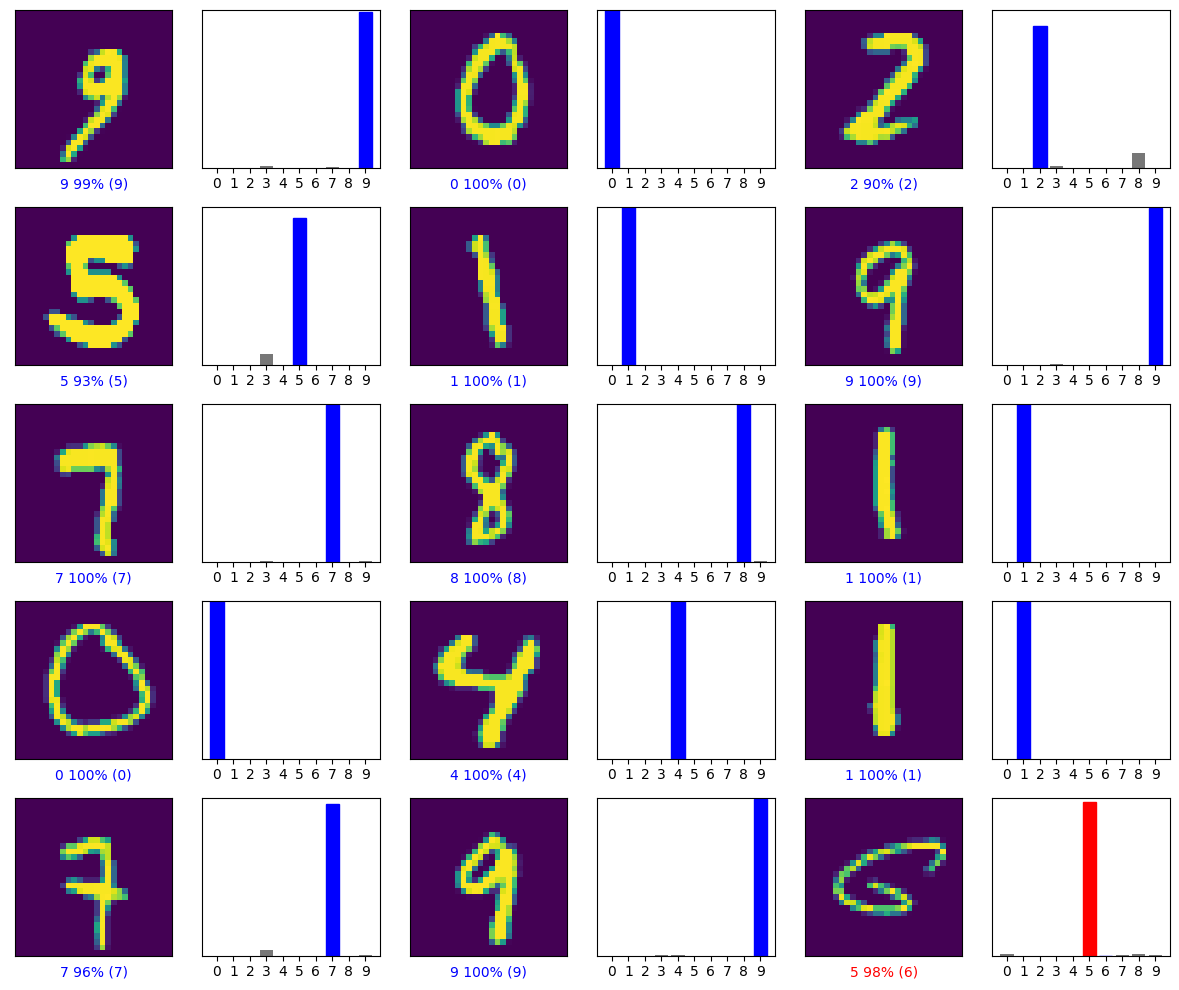

In [13]:
range_start = 1000
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(range_start,range_start+num_images):
    j = i - range_start
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [16]:
train_images[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
onnx_model,_ = tf2onnx.convert.from_keras(pred_model)
onnx.save(onnx_model, "my_model.onnx")

Could not search for non-variable resources. Concrete function internal representation may have changed.
2024-09-05 08:30:57.033096: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-09-05 08:30:57.033436: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2024-09-05 08:30:57.077496: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-09-05 08:30:57.077784: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


In [35]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 74.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 121.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 90.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 252.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [56]:
import tf2onnx
import onnxruntime as rt

spec = (tf.TensorSpec((28,28)),)

output_path = model.name + ".onnx"

model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path)
output_names = [n.name for n in model_proto.graph.output]

ValueError: in user code:

    File "/opt/app-root/lib64/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/opt/app-root/lib64/python3.9/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 28)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
      • training=False
      • mask=None
